<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Explorar-parámetros" data-toc-modified-id="Explorar-parámetros-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Explorar parámetros</a></span></li><li><span><a href="#Estaciones" data-toc-modified-id="Estaciones-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estaciones</a></span></li><li><span><a href="#Mediciones" data-toc-modified-id="Mediciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mediciones</a></span><ul class="toc-item"><li><span><a href="#Ver-series-de-tiempo" data-toc-modified-id="Ver-series-de-tiempo-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ver series de tiempo</a></span></li></ul></li><li><span><a href="#Sacar-todos-los-datos-de-la-api" data-toc-modified-id="Sacar-todos-los-datos-de-la-api-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sacar todos los datos de la api</a></span><ul class="toc-item"><li><span><a href="#Primera-corrida-(sin-datos-completos-para-distintas-horas)" data-toc-modified-id="Primera-corrida-(sin-datos-completos-para-distintas-horas)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Primera corrida (sin datos completos para distintas horas)</a></span></li><li><span><a href="#Segunda-corrida-(datos-de-2018,-todas-las-horas)" data-toc-modified-id="Segunda-corrida-(datos-de-2018,-todas-las-horas)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Segunda corrida (datos de 2018, todas las horas)</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import requests
import json
import numpy as np
from datosgobmx import client
import mplleaflet

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
client.makeCall('sinaica', {'pageSize':5000, 'parametro':'O3', 'estacionesid':259, 'page':1})

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&parametro=O3&estacionesid=259&page=1


{'pagination': {'page': 1, 'pageSize': 5000, 'total': 4846},
 'results': [{'_id': '5b928b30e2705c1932ddfdd4',
   'city': 'Valle de México',
   'date': '2018-01-01T00:00:00.000Z',
   'date-insert': '2018-09-07T14:29:04.432Z',
   'estacionesid': 259,
   'fecha': '2018-01-01',
   'hora': 0,
   'id': '259O318010100',
   'parametro': 'O3',
   'state': 'Ciudad de México',
   'validoorig': 1,
   'valororig': 0.017},
  {'_id': '5b928b30e2705c1932ddfdd5',
   'city': 'Valle de México',
   'date': '2018-01-01T01:00:00.000Z',
   'date-insert': '2018-09-07T14:29:04.432Z',
   'estacionesid': 259,
   'fecha': '2018-01-01',
   'hora': 1,
   'id': '259O318010101',
   'parametro': 'O3',
   'state': 'Ciudad de México',
   'validoorig': 1,
   'valororig': 0.019},
  {'_id': '5b928b30e2705c1932ddfdd6',
   'city': 'Valle de México',
   'date': '2018-01-01T02:00:00.000Z',
   'date-insert': '2018-09-07T14:29:04.432Z',
   'estacionesid': 259,
   'fecha': '2018-01-01',
   'hora': 2,
   'id': '259O318010102',
   

# Explorar parámetros

In [1]:
from datosgobmx import client
import pandas as pd

# Obtener los parámetros válidos para la API usando el endpoint de Sinaica
parametros_request = client.makeCall('sinaica-parametros')

valid_params = []

for v in parametros_request['results']:
    aux = pd.DataFrame.from_dict(v, orient='index').T
    valid_params.append(aux)
    
valid_params = pd.concat(valid_params, ignore_index=True)
valid_params['date-insert'] = pd.to_datetime(valid_params['date-insert'])
valid_params

CALL: https://api.datos.gob.mx/v2/sinaica-parametros


,_id,parametro,date-insert
0,5b919968e2705c1932c7a1a3,SO2,2018-09-06 21:17:28.416
1,5b919968e2705c1932c7a1a4,PM10,2018-09-06 21:17:28.416
2,5b919968e2705c1932c7a1a5,TMP,2018-09-06 21:17:28.416
3,5b919968e2705c1932c7a1a6,PM2.5,2018-09-06 21:17:28.416
4,5b919968e2705c1932c7a1a7,O3,2018-09-06 21:17:28.416
5,5b919968e2705c1932c7a1a8,CO,2018-09-06 21:17:28.416
6,5b919968e2705c1932c7a1a9,NO2,2018-09-06 21:17:28.416


# Estaciones

In [2]:
estaciones_request = client.makeCall('sinaica-estaciones', {'pageSize':200})

estaciones = []

for v in estaciones_request['results']:
    aux = pd.DataFrame.from_dict(v, orient='index').T
    estaciones.append(aux)
    
estaciones = pd.concat(estaciones, ignore_index=True)
estaciones['date-insert'] = pd.to_datetime(estaciones['date-insert'])
estaciones = estaciones.apply(lambda x: pd.to_numeric(x, errors='ignore') if x.name!='date-insert' else x)

print(estaciones.shape)
estaciones.head()

CALL: https://api.datos.gob.mx/v2/sinaica-estaciones?pageSize=200
(185, 8)


,_id,lat,long,id,nombre,codigo,redesid,date-insert
0,5b919968e2705c1932c7a1ac,21.873311,-102.320803,31,CBTIS,CBT,30,2018-09-06 21:17:28.455
1,5b919968e2705c1932c7a1ad,21.846392,-102.288431,32,Secretaría de Medio Ambiente,SMA,30,2018-09-06 21:17:28.455
2,5b919968e2705c1932c7a1ae,21.883781,-102.295825,33,Centro,CEN,30,2018-09-06 21:17:28.455
3,5b919968e2705c1932c7a1af,31.859917,-116.593722,36,Secundaria,SPABC20,31,2018-09-06 21:17:28.455
4,5b919968e2705c1932c7a1b0,32.631317,-115.444631,38,UABC,SPABC12,32,2018-09-06 21:17:28.455


In [3]:
estaciones.describe()

,lat,long,id,redesid
count,185.000000,185.000000,185.000000,185.000000
mean,21.910050,-99.701277,192.345946,77.616216
std,5.389971,15.716945,113.601417,32.582984
min,0.000000,-117.056111,31.000000,30.000000
25%,19.384444,-103.312592,96.000000,48.000000
50%,20.565000,-100.344444,166.000000,72.000000
75%,25.522694,-99.117922,268.000000,119.000000
max,34.570000,0.000000,427.000000,149.000000


In [4]:
estaciones.id.nunique(), estaciones._id.nunique(), estaciones.lat.nunique(), estaciones.long.nunique()

(185, 185, 178, 177)

In [43]:
import mplleaflet

# Estaciones son los datos obtenidos de la API, en formato Pandas DataFrame
estaciones.plot.scatter('long', 'lat', figsize=(8, 8))
mplleaflet.display()

In [44]:
estaciones.sort_values('lat')

,_id,lat,long,id,nombre,codigo,redesid,date-insert
166,5b8850e3e2705c1932e8309f,0.000000,0.000000,371,UABC,SPABC12,32,2018-08-30 20:17:39.226
174,5b8850e3e2705c1932e830a7,0.000000,0.000000,405,Las Playas,PLA,35,2018-08-30 20:17:39.226
173,5b8850e3e2705c1932e830a6,0.000000,0.000000,403,Centro de bachillerato,SPABC13,32,2018-08-30 20:17:39.226
165,5b8850e3e2705c1932e8309e,0.000000,0.000000,369,Instituto Tecnológico de Mexicali,SPABC10,32,2018-08-30 20:17:39.226
86,5b8850e3e2705c1932e8304e,16.699340,-96.866455,160,CEDART,CED,73,2018-08-30 20:17:39.220
14,5b8850e3e2705c1932e83006,16.755278,-93.120833,50,Palacio Municipal,PMN,37,2018-08-30 20:17:39.218
144,5b8850e3e2705c1932e83089,16.850331,-99.903739,293,Protección Civil,PC,122,2018-08-30 20:17:39.226
146,5b8850e3e2705c1932e8308b,17.094667,-96.752167,297,Casa Hogar,CHO,73,2018-08-30 20:17:39.226
107,5b8850e3e2705c1932e83064,17.988056,-92.939722,194,Secretaria de Educación,SE,93,2018-08-30 20:17:39.225
109,5b8850e3e2705c1932e83066,18.005675,-94.555336,234,Tecnológico,TEC,114,2018-08-30 20:17:39.225


In [50]:
estaciones.lat.value_counts().head(8)

0.000000     4
32.568825    2
19.071889    2
25.783333    2
31.859917    2
21.846392    1
19.578889    1
20.537500    1
Name: lat, dtype: int64

In [51]:
estaciones.long.value_counts().head(8)

 0.000000      4
-116.626881    2
-116.593722    2
-98.151722     2
-99.117778     2
-99.010833     2
-104.645028    1
-98.902861     1
Name: long, dtype: int64

In [54]:
estaciones[estaciones.nombre.str.lower().str.find('ciencias')!=-1]

,_id,lat,long,id,nombre,codigo,redesid,date-insert
117,5b8850e3e2705c1932e8306e,19.326389,-99.176111,245,Centro de Ciencias de la Atmósfera,CCA,119,2018-08-30 20:17:39.225


In [124]:
estaciones.to_csv('/data/calidad_aire_presidencia/data_estaciones_sinaica.csv', index=False)

# Mediciones

In [17]:
prueba = client.makeCall('sinaica', {'estacionesid':245, 'pageSize':7000})

data_estaciones = []
for v in prueba['results']:
    aux = pd.DataFrame.from_dict(v, orient='index').T
    data_estaciones.append(aux)
    
data_estaciones = pd.concat(data_estaciones, ignore_index=True)
print(data_estaciones.shape)
data_estaciones.hora.astype(int).value_counts().sort_index()

CALL: https://api.datos.gob.mx/v2/sinaica?estacionesid=245&pageSize=7000
(7000, 12)


0     210
1     146
2     221
3     254
4     269
5     304
6     308
7     311
8     314
9     316
10    317
11    313
12    312
13    314
14    309
15    309
16    312
17    311
18    312
19    310
20    310
21    306
22    308
23    304
Name: hora, dtype: int64

In [19]:
client.makeCall('sinaica', {'pageSize':5000, 'page':1})

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1


{'pagination': {'page': 1, 'pageSize': 5000, 'total': 3243971},
 'results': [{'_id': '5b8ee2f5e2705c19324d504b',
   'city': 'Guadalajara',
   'date': '2018-01-01T01:00:00.000Z',
   'date-insert': '2018-09-04T19:54:29.080Z',
   'estacionesid': 101,
   'fecha': '2018-01-01',
   'hora': 1,
   'id': '101CO18010101',
   'parametro': 'CO',
   'state': 'Jalisco',
   'validoorig': 1,
   'valororig': 1.3865},
  {'_id': '5b8ee2f5e2705c19324d504c',
   'city': 'Guadalajara',
   'date': '2018-01-01T02:00:00.000Z',
   'date-insert': '2018-09-04T19:54:29.089Z',
   'estacionesid': 101,
   'fecha': '2018-01-01',
   'hora': 2,
   'id': '101CO18010102',
   'parametro': 'CO',
   'state': 'Jalisco',
   'validoorig': 1,
   'valororig': 1.8923},
  {'_id': '5b8ee2f5e2705c19324d504d',
   'city': 'Guadalajara',
   'date': '2018-01-01T03:00:00.000Z',
   'date-insert': '2018-09-04T19:54:29.090Z',
   'estacionesid': 101,
   'fecha': '2018-01-01',
   'hora': 3,
   'id': '101CO18010103',
   'parametro': 'CO',
   'st

In [5]:
init_call_estacion = client.makeCall('sinaica', {'pageSize':7000, 'page':25})

init_call_estacion

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=7000&page=25


{'pagination': {'page': 25, 'pageSize': 7000, 'total': 3268454},
 'results': [{'_id': '5b91a96fe2705c193203a3a1',
   'city': 'Guadalajara',
   'date': '2018-05-29T22:00:00.000Z',
   'date-insert': '2018-09-06T22:25:51.144Z',
   'estacionesid': 106,
   'fecha': '2018-05-29',
   'hora': 22,
   'id': '106TMP18052922',
   'parametro': 'TMP',
   'state': 'Jalisco',
   'validoorig': 1,
   'valororig': 31.879},
  {'_id': '5b91a96fe2705c193203a3a2',
   'city': 'Guadalajara',
   'date': '2018-05-29T23:00:00.000Z',
   'date-insert': '2018-09-06T22:25:51.144Z',
   'estacionesid': 106,
   'fecha': '2018-05-29',
   'hora': 23,
   'id': '106TMP18052923',
   'parametro': 'TMP',
   'state': 'Jalisco',
   'validoorig': 1,
   'valororig': 29.543},
  {'_id': '5b91a96fe2705c193203a3a3',
   'city': 'Guadalajara',
   'date': '2018-05-30T00:00:00.000Z',
   'date-insert': '2018-09-06T22:25:51.144Z',
   'estacionesid': 106,
   'fecha': '2018-05-30',
   'hora': 0,
   'id': '106TMP18053000',
   'parametro': 'TMP

In [6]:
data_estaciones = []
for v in init_call_estacion['results']:
    aux = pd.DataFrame.from_dict(v, orient='index').T
    data_estaciones.append(aux)
    
data_estaciones = pd.concat(data_estaciones, ignore_index=True)
print(data_estaciones.shape)
data_estaciones.head()

(7000, 12)


,_id,date,validoorig,date-insert,city,state,valororig,parametro,estacionesid,id,hora,fecha
0,5b91a96fe2705c193203a3a1,2018-05-29T22:00:00.000Z,1,2018-09-06T22:25:51.144Z,Guadalajara,Jalisco,31.879,TMP,106,106TMP18052922,22,2018-05-29
1,5b91a96fe2705c193203a3a2,2018-05-29T23:00:00.000Z,1,2018-09-06T22:25:51.144Z,Guadalajara,Jalisco,29.543,TMP,106,106TMP18052923,23,2018-05-29
2,5b91a96fe2705c193203a3a3,2018-05-30T00:00:00.000Z,1,2018-09-06T22:25:51.144Z,Guadalajara,Jalisco,29.046,TMP,106,106TMP18053000,0,2018-05-30
3,5b91a96fe2705c193203a3a4,2018-05-30T01:00:00.000Z,1,2018-09-06T22:25:51.144Z,Guadalajara,Jalisco,28.937,TMP,106,106TMP18053001,1,2018-05-30
4,5b91a96fe2705c193203a3a5,2018-05-30T02:00:00.000Z,1,2018-09-06T22:25:51.144Z,Guadalajara,Jalisco,28.28,TMP,106,106TMP18053002,2,2018-05-30


In [34]:
# Las horas están raras
data_estaciones.hora.astype(int).value_counts().sort_index()

0     223
1     313
2     486
3     547
4     545
5     630
6     586
7     484
8     352
9     334
10    333
11    328
12    327
13    330
14    320
15    320
16    300
17    203
18     39
Name: hora, dtype: int64

In [20]:
data_estaciones.dtypes

_id             object
validoorig      object
date-insert     object
city            object
state           object
valororig       object
parametro       object
estacionesid    object
id              object
hora            object
fecha           object
dtype: object

In [73]:
(1.69*14003665/5000)/3600

1.3147885472222223

In [74]:
# Número de registros/registros por página = número de páginas
14003665/5000

2800.733

In [76]:
client.makeCall('sinaica', {'pageSize':5000, 'page':2802})

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2802


{'pagination': {'page': 2802, 'pageSize': 5000, 'total': 14003665},
 'results': []}

In [22]:
data_estaciones.groupby('estacionesid').parametro.nunique().value_counts()

4    34
5    29
3    23
2    12
1     3
Name: parametro, dtype: int64

In [23]:
data_estaciones.estacionesid.value_counts()

306    115
127    113
102    111
125    110
87     110
33     109
124    109
292    108
78     105
77     104
304    104
297    102
126    101
137    101
53     100
128     97
136     97
141     94
110     92
107     91
256     91
271     91
108     91
103     90
174     90
93      90
72      89
96      88
260     87
263     86
      ... 
242     55
300     55
75      55
265     52
144     51
123     51
270     50
248     50
257     50
268     48
76      47
247     47
259     41
39      38
261     38
131     38
47      37
146     36
38      36
243     33
253     31
254     30
302     29
258     29
132     26
267     22
172     19
187      8
241      5
358      3
Name: estacionesid, Length: 101, dtype: int64

## Ver series de tiempo

In [25]:
estacion = data_estaciones[data_estaciones.estacionesid==306]
estacion = estacion.apply(lambda x: pd.to_numeric(x, errors='ignore'))
print(estacion.shape)
estacion.head()

(115, 11)


,_id,validoorig,date-insert,city,state,valororig,parametro,estacionesid,id,hora,fecha
3,59625609b9ef978dc956e3cf,1,2017-07-09T16:11:10.478Z,Piedras Negras,Coahuila,9.921200,PM10,306,306PM1017070911,11,2017-07-09
237,59626418b9ef978dc956fd49,1,2017-07-09T17:11:10.031Z,Piedras Negras,Coahuila,0.001770,NO2,306,306NO217070912,12,2017-07-09
260,59626418b9ef978dc956fd61,1,2017-07-09T17:11:10.037Z,Piedras Negras,Coahuila,16.224000,PM10,306,306PM1017070912,12,2017-07-09
269,59626418b9ef978dc956fd6a,1,2017-07-09T17:11:10.038Z,Piedras Negras,Coahuila,0.029788,O3,306,306O317070912,12,2017-07-09
285,59626418b9ef978dc956fd7a,1,2017-07-09T17:11:10.039Z,Piedras Negras,Coahuila,0.003594,SO2,306,306SO217070912,12,2017-07-09


In [30]:
estacion.hora.value_counts().sort_index()

0      5
1      5
2      5
3      5
4      5
5      5
6      5
7      5
8      5
9      5
10     5
11     6
12    10
13    10
14    10
15     9
16     5
17     5
18     5
Name: hora, dtype: int64

In [27]:
estacion.parametro.unique()

array(['PM10', 'NO2', 'O3', 'SO2', 'PM2.5'], dtype=object)

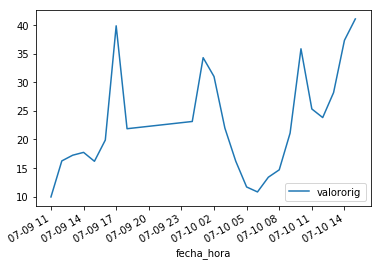

In [28]:
estacion['fecha_hora'] = pd.to_datetime(estacion.fecha + ' ' + estacion.hora.astype(str) +':00:00')
estacion = estacion.set_index('fecha_hora')
estacion[estacion.parametro=='PM10'].sort_index().plot(y='valororig')

# Sacar todos los datos de la api

## Primera corrida (sin datos completos para distintas horas)

- La primera vez que corrimos la api para obtener los datos faltaba información a partir de las 18 horas.

In [123]:
from tqdm import tqdm_notebook
from pathlib import Path

# Hay 14003665 registros el 30 de agosto de 2018 a las 17:34
for page in tqdm_notebook(range(1895, 2803)):
    
    filename = 'page_%i_sinaica_mediciones.json' %page
    filename = '/data/calidad_aire_presidencia/sinaica_mediciones_jsons/'+filename
    # Revisamos si el archivo ya existe (suponemos que no hay cambios en la paginación)
    if not Path(filename).is_file():
        data_api = client.makeCall('sinaica', {'pageSize':5000, 'page':page})
        with open(filename, 'w') as outfile:
            json.dump(data_api, outfile)

HBox(children=(IntProgress(value=0, max=908), HTML(value='')))

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1895
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1896
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1897
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1898
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1899
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1900
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1901
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1902
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1903
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1904
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1905
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1906
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1907
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1908
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1909
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2020
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2021
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2022
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2023
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2024
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2025
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2026
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2027
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2028
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2029
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2030
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2031
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2032
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2033
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2034
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2145
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2146
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2147
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2148
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2149
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2150
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2151
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2152
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2153
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2154
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2155
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2156
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2157
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2158
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2159
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2270
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2271
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2272
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2273
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2274
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2275
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2276
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2277
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2278
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2279
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2280
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2281
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2282
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2283
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2284
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2395
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2396
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2397
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2398
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2399
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2400
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2401
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2402
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2403
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2404
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2405
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2406
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2407
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2408
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2409
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2520
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2521
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2522
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2523
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2524
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2525
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2526
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2527
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2528
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2529
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2530
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2531
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2532
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2533
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2534
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2645
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2646
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2647
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2648
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2649
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2650
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2651
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2652
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2653
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2654
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2655
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2656
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2657
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2658
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2659
CALL: http

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2770
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2771
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2772
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2773
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2774
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2775
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2776
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2777
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2778
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2779
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2780
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2781
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2782
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2783
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=2784
CALL: http

## Segunda corrida (datos de 2018, todas las horas)

In [46]:
client.makeCall('sinaica', {'pageSize':5000, 'page':1})

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=1


{'pagination': {'page': 1, 'pageSize': 5000, 'total': 3244509},
 'results': [{'_id': '5b8ef752e2705c1932ce5ee4',
   'city': 'Guadalajara',
   'date': '2018-01-01T01:00:00.000Z',
   'date-insert': '2018-09-04T21:21:21.989Z',
   'estacionesid': 101,
   'fecha': '2018-01-01',
   'hora': 1,
   'id': '101CO18010101',
   'parametro': 'CO',
   'state': 'Jalisco',
   'validoorig': 1,
   'valororig': 1.3865},
  {'_id': '5b8ef752e2705c1932ce5ee5',
   'city': 'Guadalajara',
   'date': '2018-01-01T02:00:00.000Z',
   'date-insert': '2018-09-04T21:21:21.995Z',
   'estacionesid': 101,
   'fecha': '2018-01-01',
   'hora': 2,
   'id': '101CO18010102',
   'parametro': 'CO',
   'state': 'Jalisco',
   'validoorig': 1,
   'valororig': 1.8923},
  {'_id': '5b8ef752e2705c1932ce5ee6',
   'city': 'Guadalajara',
   'date': '2018-01-01T03:00:00.000Z',
   'date-insert': '2018-09-04T21:21:21.995Z',
   'estacionesid': 101,
   'fecha': '2018-01-01',
   'hora': 3,
   'id': '101CO18010103',
   'parametro': 'CO',
   'st

In [23]:
3244192/5000

648.8384

In [47]:
from tqdm import tqdm_notebook
from pathlib import Path

# Hay 3243971 registros el 4 de septiembre 2018 a las 15:13
for page in tqdm_notebook(range(199 , 650)):
    
    filename = 'page_%i_sinaica_mediciones.json' %page
    filename = '/data/calidad_aire_presidencia/sinaica_mediciones_jsons_2/'+filename
    # Revisamos si el archivo ya existe (suponemos que no hay cambios en la paginación)
#     if not Path(filename).is_file():
    if True:
        data_api = client.makeCall('sinaica', {'pageSize':5000, 'page':page})
        with open(filename, 'w') as outfile:
            json.dump(data_api, outfile)

HBox(children=(IntProgress(value=0, max=451), HTML(value='')))

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=199
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=200
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=201
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=202
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=203
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=204
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=205
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=206
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=207
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=208
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=209
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=210
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=211
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=212
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=213
CALL: https://api.datos.g

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=326
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=327
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=328
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=329
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=330
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=331
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=332
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=333
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=334
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=335
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=336
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=337
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=338
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=339
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=340
CALL: https://api.datos.g

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=453
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=454
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=455
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=456
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=457
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=458
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=459
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=460
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=461
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=462
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=463
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=464
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=465
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=466
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=467
CALL: https://api.datos.g

CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=580
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=581
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=582
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=583
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=584
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=585
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=586
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=587
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=588
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=589
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=590
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=591
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=592
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=593
CALL: https://api.datos.gob.mx/v2/sinaica?pageSize=5000&page=594
CALL: https://api.datos.g